In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron


In [21]:
# read train data # src = https://www.kaggle.com/c/titanic/data?select=train.csv
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
data_test
data_test_survive = pd.read_csv('data/gender_submission.csv')
data_test_survive.head()
data_test['Survived'] = data_test_survive[['Survived']]

In [22]:
import seaborn as sns
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

C:\Users\SONY\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


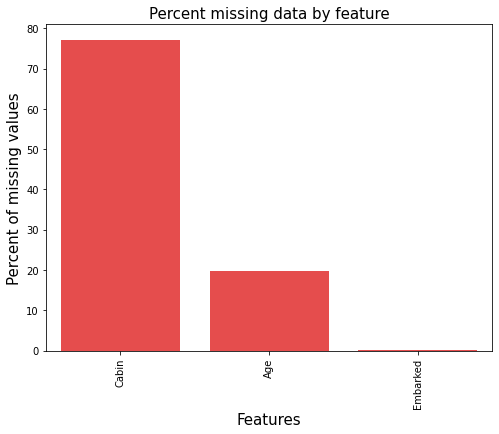

In [23]:
missingdata(data_train)

In [24]:
# preprocess Data
data_train = data_train.replace(['male','female'],[0, 1]) # male =0, female =1
data_train = data_train.replace(["S", "C", "Q"], [0, 1, 2])
# data clean

data_test = data_test.replace(['male','female'], [0, 1])
data_test = data_test.replace(['S','C', 'Q'], [0, 1, 2])

data_train['Age'].fillna(data_train['Age'].median(), inplace= True)
data_test['Age'].fillna(data_test['Age'].median(), inplace= True)

data_train['Embarked'].fillna(data_train['Embarked'].median(), inplace= True)
data_test['Embarked'].fillna(data_test['Embarked'].median(), inplace= True)

data_test['Fare'].fillna(data_test['Fare'].median(), inplace= True)

data_train['Family'] = data_train['SibSp'] + data_train['Parch'] + 1
data_test['Family'] = data_test['SibSp'] + data_test['Parch'] + 1


drop_col = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data_train.drop(drop_col, axis=1, inplace= True)
data_test.drop(drop_col, axis=1, inplace= True)

data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,22.0,1,0,7.2500,0.0,2
1,1,1,1,38.0,1,0,71.2833,1.0,2
2,1,3,1,26.0,0,0,7.9250,0.0,1
3,1,1,1,35.0,1,0,53.1000,0.0,2
4,0,3,0,35.0,0,0,8.0500,0.0,1


In [25]:
corr = data_train.corr()
corr['Survived']

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked    0.106811
Family      0.016639
Name: Survived, dtype: float64

In [26]:
data_train.head()
d = preprocessing.normalize(data_train)
names = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family']
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0.000000,0.127855,0.000000,0.937604,0.042618,0.0,0.308983,0.000000,0.085237
1,0.012371,0.012371,0.012371,0.470093,0.012371,0.0,0.881836,0.012371,0.024742
2,0.036495,0.109486,0.036495,0.948876,0.000000,0.0,0.289225,0.000000,0.036495
3,0.015708,0.015708,0.015708,0.549795,0.015708,0.0,0.834117,0.000000,0.031417
4,0.000000,0.083211,0.000000,0.970799,0.000000,0.0,0.223284,0.000000,0.027737


In [27]:
corr = data_train.corr()
corr['Survived']

Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked    0.106811
Family      0.016639
Name: Survived, dtype: float64

In [28]:
X_data= np.array(data_train[['Sex','Fare','Pclass','Embarked','Age']])
Y_data = np.array(data_train[['Survived']])
Y_data = Y_data.reshape(-1, 1)

In [29]:
# model
model = tf.keras.models.Sequential([
    Dense(5, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation= 'relu'),
    Dense(128, activation= 'relu'),
    Dense(32, activation= 'relu'),
    Dense(2, activation= 'softmax')
])

In [30]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
loss = tf.losses.sparse_categorical_crossentropy,
metrics=['accuracy']

)

In [31]:
# train
train_output = model.fit(X_data, Y_data, epochs= 200)
model.save('model/titanic.h5')
np.mean(train_output.history['accuracy'])


Epoch 1/200
28/28 [==============================] - 1s 5ms/step - loss: 0.8095 - accuracy: 0.6397
Epoch 2/200
28/28 [==============================] - 0s 5ms/step - loss: 0.6168 - accuracy: 0.6689
Epoch 3/200
28/28 [==============================] - 0s 5ms/step - loss: 0.6086 - accuracy: 0.6790
Epoch 4/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6148 - accuracy: 0.6723
Epoch 5/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.6756
Epoch 6/200
28/28 [==============================] - 0s 6ms/step - loss: 0.6064 - accuracy: 0.6734
Epoch 7/200
28/28 [==============================] - 0s 6ms/step - loss: 0.5860 - accuracy: 0.6521
Epoch 8/200
28/28 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.6857
Epoch 9/200
28/28 [==============================] - 0s 6ms/step - loss: 0.5757 - accuracy: 0.6779
Epoch 10/200
28/28 [==============================] - 0s 4ms/step - loss: 0.5577 - accuracy: 0.6891
Epoch 11/

0.7986980935931206

In [32]:
np.max(train_output.history['accuracy'])

0.8305274844169617

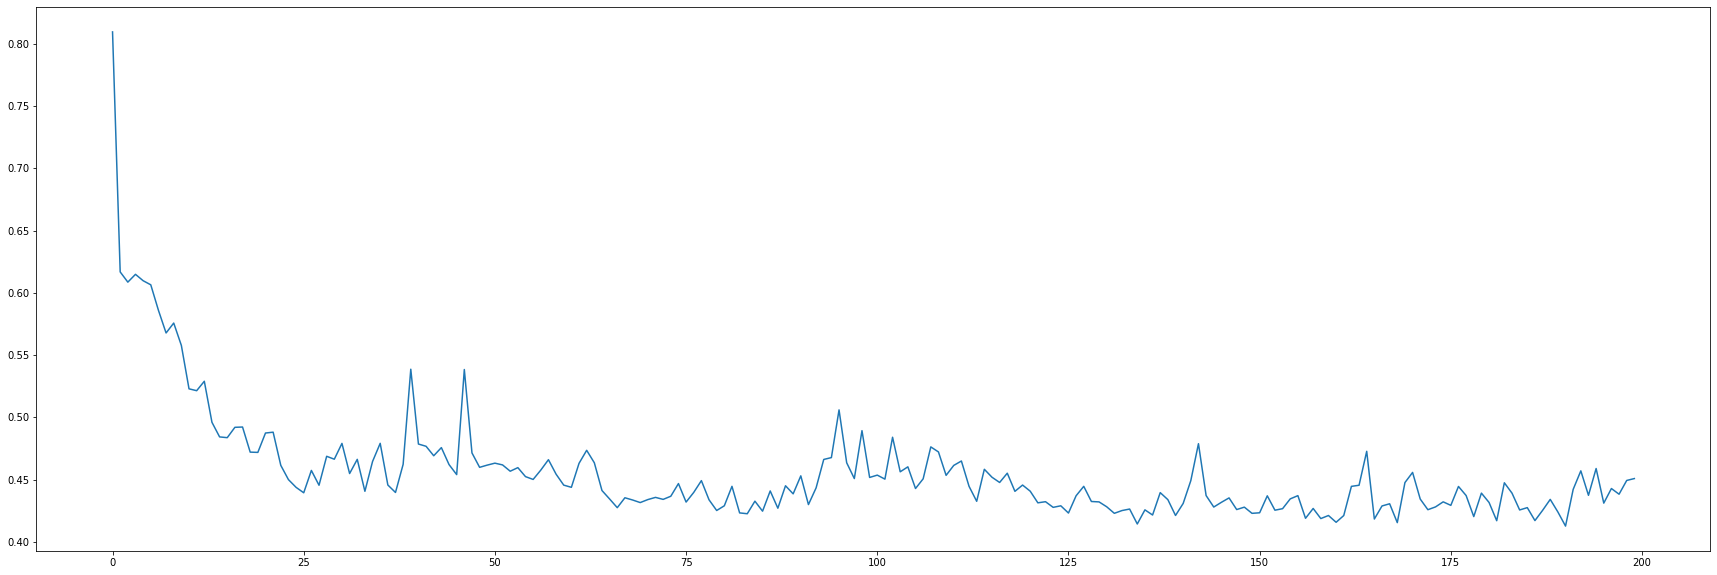

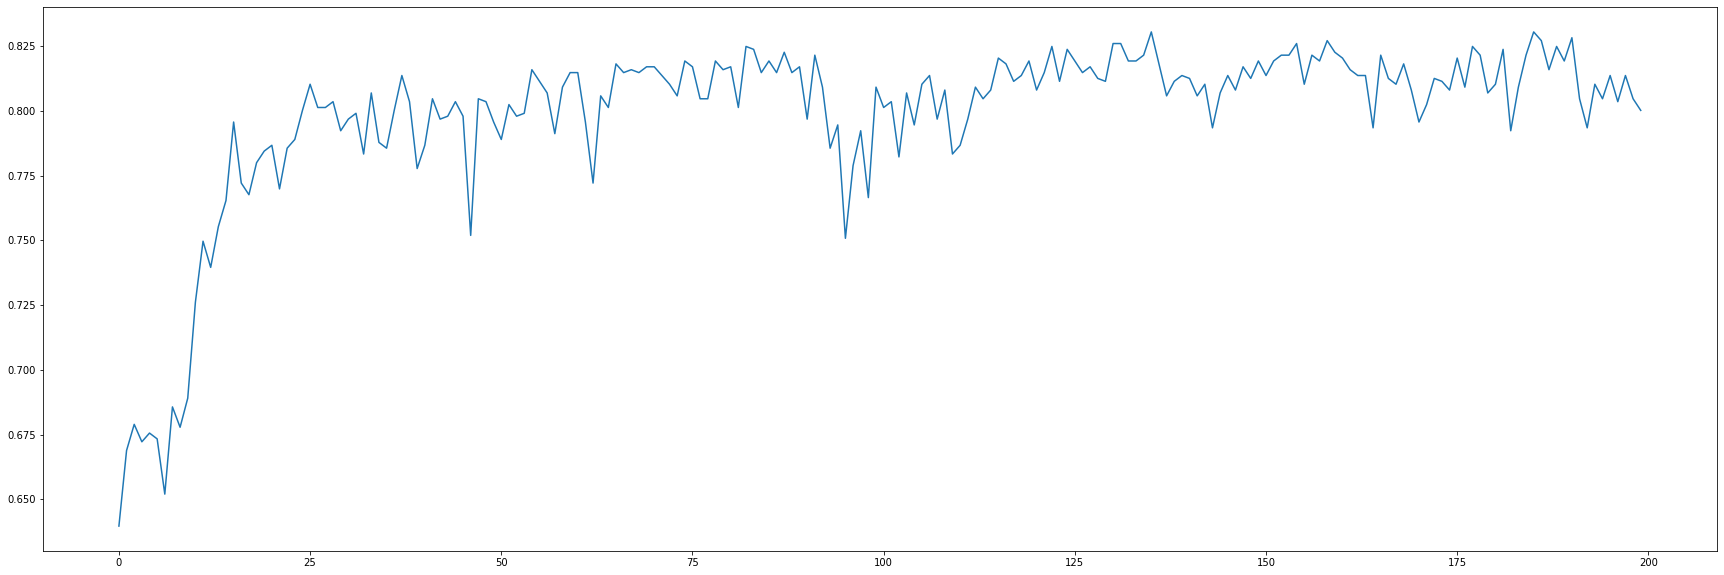

In [33]:
plt.figure(figsize=(30,10) )
plt.plot(train_output.history['loss'])
plt.show()
plt.figure(figsize=(30,10) )
plt.plot(train_output.history['accuracy'])
plt.show()

In [34]:
np.mean(train_output.history['accuracy'])

0.7986980935931206

In [35]:
# data_test
X_test= np.array(data_test[['Sex','Fare','Pclass','Embarked','Age']])
Y_test = np.array(data_test[['Survived']])
Y_test = Y_test.reshape(-1, 1)
model.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.9617


[0.24870112538337708, 0.9617224931716919]

In [36]:
person = np.array([[0.0, 0.22, 0.08, 0, 0.97]])

result = model.predict(person)
np.argmax(result)

1

In [37]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors= 2)
neigh.fit(X_data, Y_data)
cv_predict = neigh.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, cv_predict)
print(acc)

0.6698564593301436


C:\Users\SONY\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:
p = Perceptron()
p.fit(X_data, Y_data)

Y_pred = p.predict(X_test)
test_score = accuracy_score(Y_test, Y_pred)
print("score on train data: ", test_score)
   


score on train data:  0.7440191387559809


C:\Users\SONY\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
